In [1]:
import os
import sys
sys.path.insert(0,  '..')

In [2]:
from pytorchutils.history import plot
import os
%matplotlib inline

unet-train unet-valid


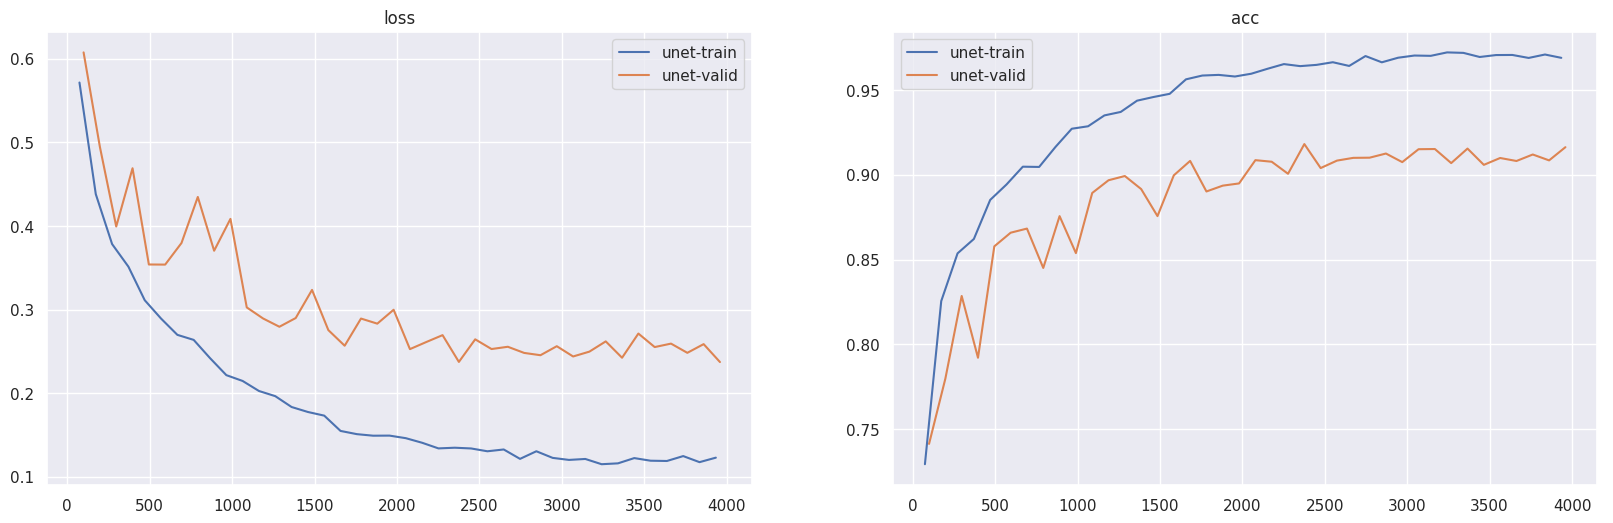

In [4]:
plot('./saved_model/unet',show=['train','valid'])

In [5]:
'c' in a

False

In [3]:
a = list(range(10))
10 in a

False

In [1]:
import argparse
import os
# import sys
# sys.path.insert(0, os.path.abspath(
#     os.path.join(os.path.dirname(__file__), '..')))

import skimage
import torch
import torchvision
import torchvision.transforms as transforms
from pytorchutils.models.unet import UNet
from pytorchutils.trainer import Trainer
from torch import nn, optim
import numpy as np

os.environ['CUDA_VISIBLE_DEVICES'] = '1'


class MyDataloader(torch.utils.data.Dataset):
    def __init__(self, path):
        self.img_path = os.path.join(path, 'img')
        self.mask_path = os.path.join(path, 'mask')
        self.img_list = [x[:-4] for x in os.listdir(self.img_path)]

    def __len__(self):
        return len(self.img_list)

    def __getitem__(self, idx):
        img_name = self.img_list[idx]
        img_path = os.path.join(self.img_path, img_name+'.png')
        mask_path = os.path.join(self.mask_path, img_name+"_mask.png")

        img = skimage.io.imread(img_path)
        mask = skimage.io.imread(mask_path)

        img = np.transpose(img,(2,0,1))
        img = img/255.0
        mask = np.sum(mask,axis=-1)
        mask[mask>0] = 1
        mask = np.int32(mask)
        # mask = mask.reshape(np.shape(mask)[:-1])

        img = torch.FloatTensor(img)
        mask = torch.IntTensor(mask)
        return img, mask


train_dataloader = MyDataloader("/home/yejiandong/server-96/meike/stone-data")
# train_dataloader = MyDataloader("/Users/stone/server/meike/stone-data")
train_dataloader = torch.utils.data.DataLoader(train_dataloader, batch_size=4,
                                               shuffle=True,
                                               pin_memory=True)

img,mask = next(iter(train_dataloader))
print(img.size(),mask.size(),torch.typename(img))
net = UNet(n_channels=3, n_classes=1).cuda()
img = img.cuda()
mask = mask.cuda()
outputs = net(img)



torch.Size([4, 3, 512, 680]) torch.Size([4, 512, 680]) torch.FloatTensor
tensor([[[[0.5255, 0.5255, 0.5333,  ..., 0.4431, 0.3922, 0.3451],
          [0.5373, 0.5333, 0.5333,  ..., 0.4314, 0.4000, 0.3529],
          [0.5412, 0.5333, 0.5255,  ..., 0.4392, 0.4471, 0.4078],
          ...,
          [0.3059, 0.3216, 0.3373,  ..., 0.4157, 0.4078, 0.4118],
          [0.2784, 0.2941, 0.3216,  ..., 0.4314, 0.4275, 0.4314],
          [0.2784, 0.2902, 0.3216,  ..., 0.4353, 0.4392, 0.4549]],

         [[0.4980, 0.4980, 0.5059,  ..., 0.4118, 0.3686, 0.3294],
          [0.5098, 0.5059, 0.5059,  ..., 0.4000, 0.3765, 0.3412],
          [0.5137, 0.5020, 0.4941,  ..., 0.4157, 0.4235, 0.3961],
          ...,
          [0.2549, 0.2745, 0.2980,  ..., 0.4196, 0.4196, 0.4314],
          [0.2275, 0.2392, 0.2706,  ..., 0.4235, 0.4196, 0.4196],
          [0.2196, 0.2353, 0.2706,  ..., 0.4118, 0.4039, 0.4039]],

         [[0.4235, 0.4235, 0.4353,  ..., 0.4706, 0.4235, 0.3843],
          [0.4392, 0.4353, 0.4431, 

/usr/local/anaconda3/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
/usr/local/anaconda3/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
/usr/local/anaconda3/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
/usr/local/anaconda3/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate

RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

(1, 512, 680)


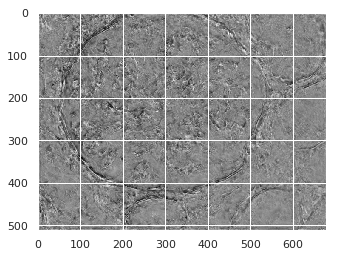

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
img = outputs[0].detach().cpu().numpy()
print(np.shape(img))
img = np.transpose(img,(1,2,0))
img = np.reshape(img,np.shape(img)[:-1])
plt.imshow(img,cmap='gray')